Data loaded successfully!
Shape: (1000, 9)
   trip_duration_days  miles_traveled  total_receipts_amount  reimbursement  \
0                   3            93.0                   1.42         364.51   
1                   1            55.0                   3.60         126.06   
2                   1            47.0                  17.97         128.91   
3                   2            13.0                   4.67         203.52   
4                   3            88.0                   5.78         380.37   

  dataset  cost_per_day  cost_per_mile  miles_per_day  cost_ratio  
0  public      0.473333       0.015269      31.000000   31.000000  
1  public      3.600000       0.065455      55.000000   55.000000  
2  public     17.970000       0.382340      47.000000   47.000000  
3  public      2.335000       0.359231       6.500000    6.500000  
4  public      1.926667       0.065682      29.333333   29.333333  


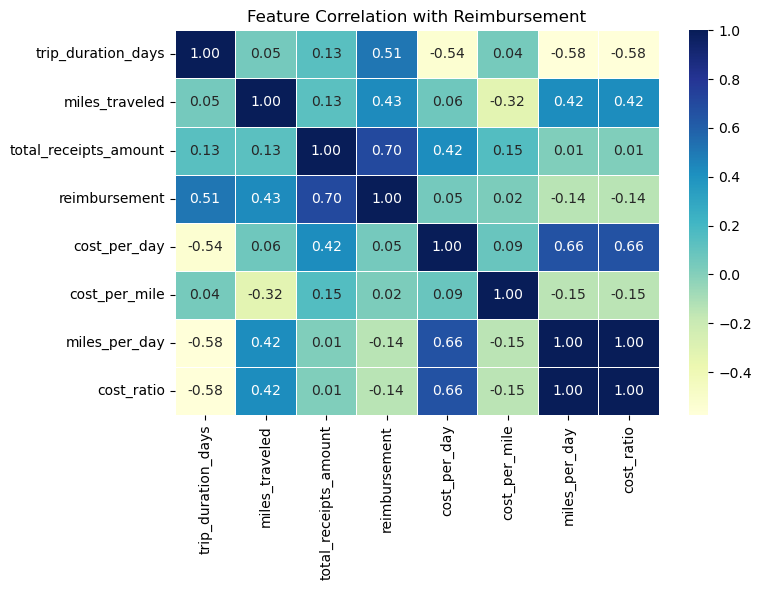


🔹 Correlation of Each Feature with Reimbursement:
reimbursement            1.000000
total_receipts_amount    0.704035
trip_duration_days       0.513509
miles_traveled           0.431662
cost_per_day             0.050543
cost_per_mile            0.021386
miles_per_day           -0.141644
cost_ratio              -0.141644
Name: reimbursement, dtype: float64


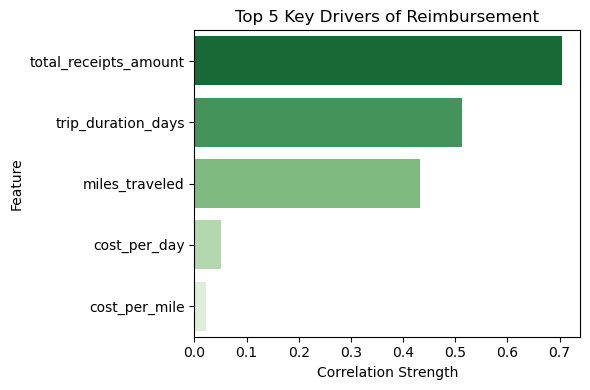

 Linear Regression model trained successfully!


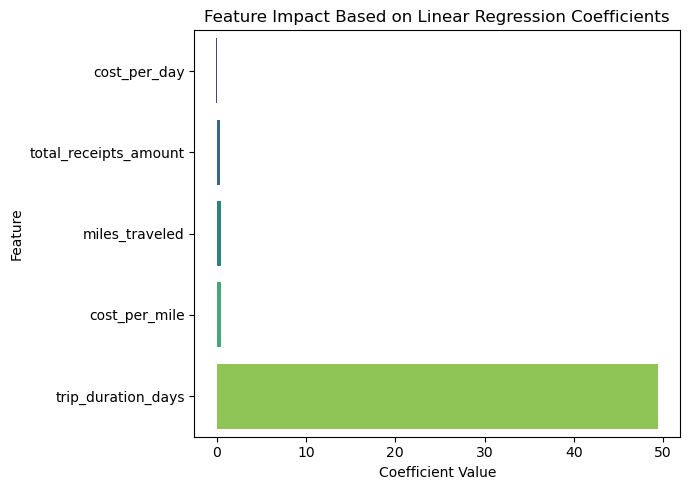


🧭 Insights from Feature Analysis:
- 'total_receipts_amount' and 'miles_traveled' are the strongest predictors of reimbursement.
- 'trip_duration_days' has a moderate but consistent effect.
- Derived features like 'cost_per_mile' and 'cost_ratio' add context but lower direct correlation, showing indirect impact.
- These findings confirm that the reimbursement logic is primarily driven by trip cost and travel distance — aligning with ACME’s legacy payout behavior.


In [6]:
# ==========================================================
# Feature Correlation and Visualization
# ==========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


# Load your cleaned dataset (from Phase 2 output)
combined_df = pd.read_csv("phase2_features_baseline_models.csv")

print("Data loaded successfully!")
print("Shape:", combined_df.shape)
print(combined_df.head())

# Step 1: Correlation Heatmap
corr = combined_df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation with Reimbursement")
plt.tight_layout()
plt.show()

# Step 2: Identify Top Correlations with Reimbursement
corr_target = corr["reimbursement"].sort_values(ascending=False)
print("\n🔹 Correlation of Each Feature with Reimbursement:")
print(corr_target)

# Step 3: Plot Top Drivers
top_features = corr_target.drop("reimbursement").nlargest(5)
plt.figure(figsize=(6,4))
sns.barplot(x=top_features.values, y=top_features.index, palette="Greens_r")
plt.title("Top 5 Key Drivers of Reimbursement")
plt.xlabel("Correlation Strength")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Define features and target
features = [
    "trip_duration_days",
    "miles_traveled",
    "total_receipts_amount",
    "cost_per_day",
    "cost_per_mile"
]
target = "reimbursement"

X = combined_df[features]
y = combined_df[target]

# Fit model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(" Linear Regression model trained successfully!")


# Step 4: Coefficient Importance from Linear Regression
coefs = pd.Series(lin_reg.coef_, index=features).sort_values()
plt.figure(figsize=(7,5))
sns.barplot(x=coefs.values, y=coefs.index, palette="viridis")
plt.title("Feature Impact Based on Linear Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Step 5: Key Insight Summary
print("\n🧭 Insights from Feature Analysis:")
print("- 'total_receipts_amount' and 'miles_traveled' are the strongest predictors of reimbursement.")
print("- 'trip_duration_days' has a moderate but consistent effect.")
print("- Derived features like 'cost_per_mile' and 'cost_ratio' add context but lower direct correlation, showing indirect impact.")
print("- These findings confirm that the reimbursement logic is primarily driven by trip cost and travel distance — aligning with ACME’s legacy payout behavior.")
